# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [3]:
# Your import 
import pandas as pd
import numpy as np

# Load the Pokémon dataset
pokemon_data = pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [7]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']


# Select all features + derived  
# target: Legendary 
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs',
            'capture_rt', 'sp_attack_to_sp_defense_ratio', 'type']
target = 'legendary'

X = pokemon_data[features] # Assign the features to X
y = pokemon_data[target] # Assign the target value to y

### 2.2 Data Transformation Using ColumnTransformer

In [15]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler

# Categorical and numerical columns
categorical_features = ['type'] # Type is the only categorical column
# The numerical features are every column except 'type'
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
numeric_transformer = StandardScaler()

# please use OneHot as your Encoder
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [21]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)

In [23]:
# Your import 
from sklearn.model_selection import train_test_split

# Please use train_test_split to prepare your data
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[-0.40006789, -0.26044725, -0.968214  , -1.10700876, -1.77001294,
         -0.9517153 ,  1.19130465, -0.13843446,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.        ],
        [ 0.19111895, -0.09784534, -0.19502508, -0.03220389, -0.52510226,
         -0.1542614 , -0.70940526, -0.30764966,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ]]),
 array([[ 0.53338501,  0.38996038,  1.19671498,  0.86346683,  0.44316161,
          0.89502004, -0.70940526,  0.23562019,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.

## Step 3: Logistic Regression

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=300, random_state=42)

# Train Logistic Regression

logistic_model.fit(X_train, y_train)



# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)

y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)



print("Kiyrah Keith + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Kiyrah Keith + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.83      1.00      0.91        10

    accuracy                           0.98       120
   macro avg       0.92      0.99      0.95       120
weighted avg       0.99      0.98      0.98       120

Validation AUC: 0.9918
Validation accuracy: 0.9833


## Step 4: Multi-Layer Perceptron (MLP)

In [29]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)


# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.


# Train MLP Classifier
mlp_model.fit(X_train, y_train)

# Evaluate MLP Classifier
y_val_pred_mlp = mlp_model.predict(X_val) # Get the predictions
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1] # Get the probabilities
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("Kiyrah Keith + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Kiyrah Keith + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.83      1.00      0.91        10

    accuracy                           0.98       120
   macro avg       0.92      0.99      0.95       120
weighted avg       0.99      0.98      0.98       120

Validation AUC: 0.9936
Validation accuracy: 0.9833


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations

# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(
    max_iter=1, # One iteration at a time
    solver='saga', 
    random_state=42,
    warm_start=True # Continue from last state
)

# To store the loss values
loss_curve = []

# Train the model incrementally
for i in range(1, 501): # 500 iterations
    logistic_model.fit(X_train, y_train) # Complete one iteration
    y_train_prob = logistic_model.predict_proba(X_train) # Predict probablities
    loss = log_loss(y_train, y_train_prob) # Calculate log-loss
    loss_curve.append(loss) # Add each iteration to the loss curve



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

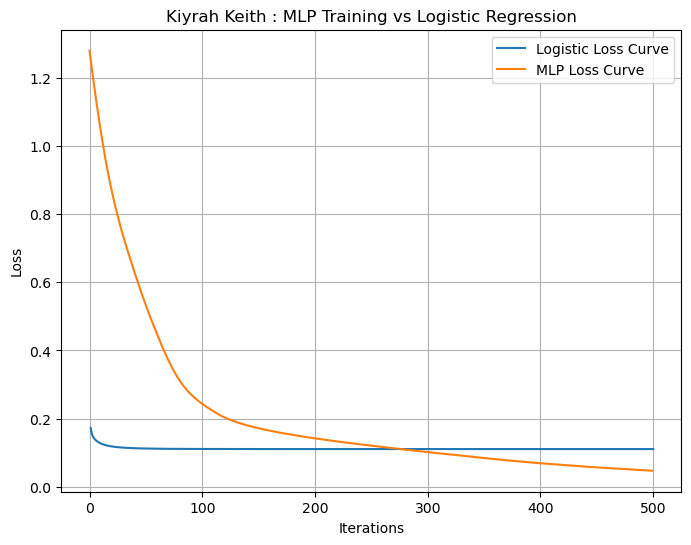

In [33]:
# Extract loss during MLP training
mlp_model_loss_curve = mlp_model.loss_curve_
logic_loss = loss_curve
 

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
plt.figure(figsize=(8,6))
plt.plot(range(1, len(logic_loss)+1), logic_loss, label="Logistic Loss Curve")
plt.plot(mlp_model_loss_curve, label="MLP Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Kiyrah Keith : MLP Training vs Logistic Regression")
plt.grid()
plt.legend()
plt.show()

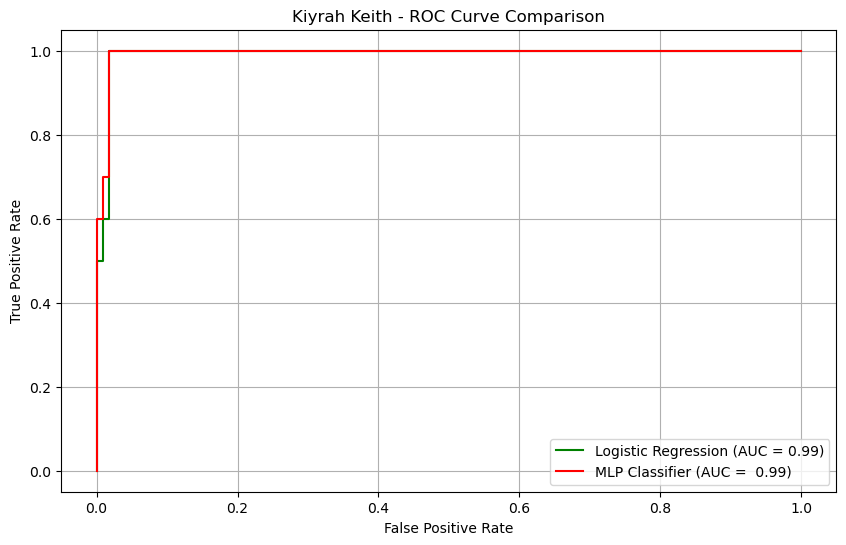

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison

# Plot ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
 
# please set color of Logistic as green, set MLP as red.
plt.figure(figsize=(10,6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})", color='g')
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Classifier (AUC = {auc_val_mlp: .2f})", color='r')
plt.title("Kiyrah Keith - ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
 

## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

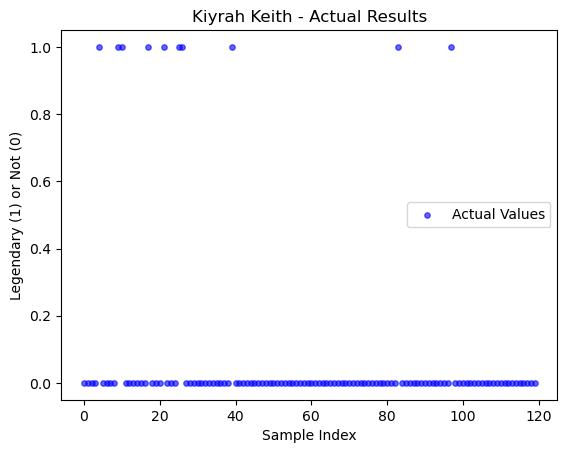

In [45]:
# Please plot the Actual data and Predicted for Logistic and MLP model
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.6, label="Actual Values", s=15)
plt.title("Kiyrah Keith - Actual Results")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

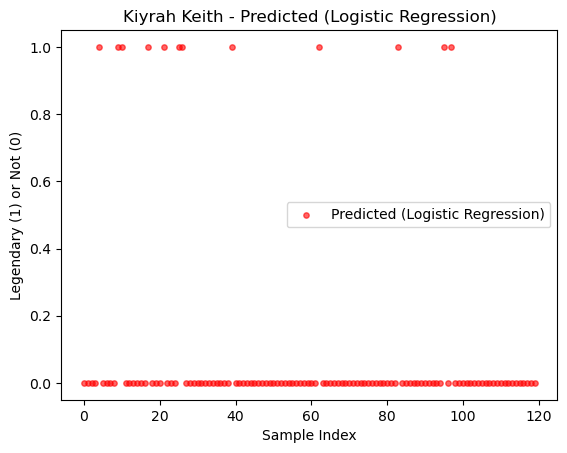

In [47]:
plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=15)
plt.title("Kiyrah Keith - Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

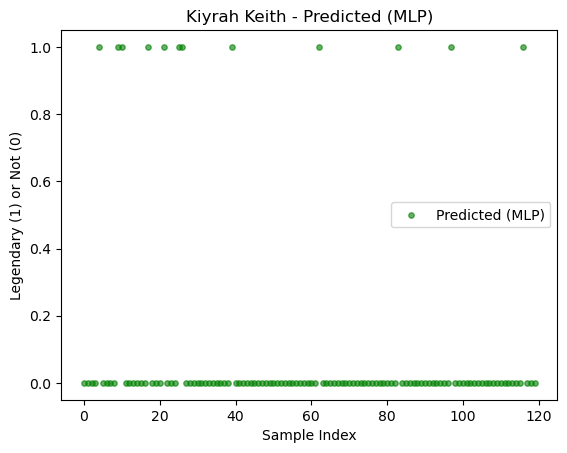

In [49]:
plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=15)
plt.title("Kiyrah Keith - Predicted (MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

### Confusion Matrices

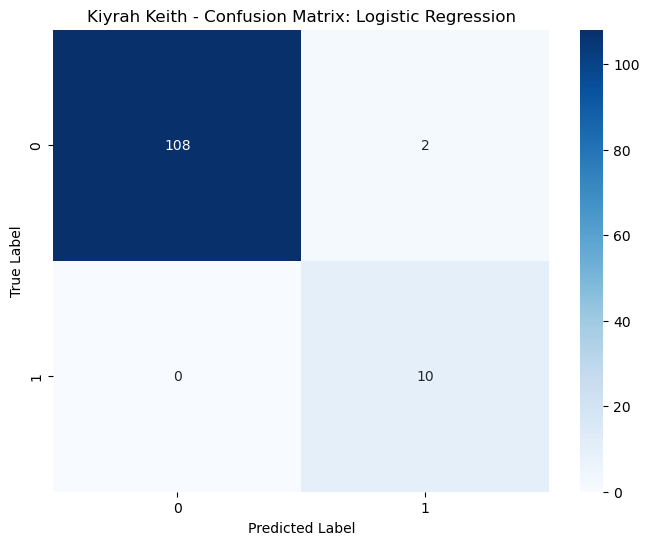

In [51]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues") # Create a blue heatmap
plt.title("Kiyrah Keith - Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

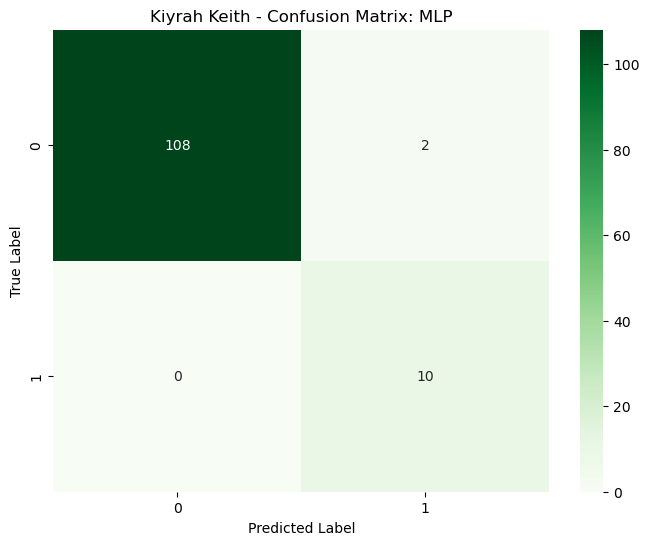

In [53]:
# plot MLP
# Create the confusion matrix 
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens") # Create a green heatmap
plt.title("Kiyrah Keith - Confusion Matrix: MLP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Conclusion

In [ ]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea :
# For this particular logistic regression classifier and MLP classifer, 
# the confusion matrix was identical for the values of True and Predicted values. 
# From the loss curve, we can see that the MLP classifier took approximately 275 iterations
# to reach the same loss value as logistic regression reached almost immediately. 
# I think this is because there is a small number of features, and the pre-processing 
# scaling helped the logistic regression accurately classifier the features quickly. 
# For more complex sets of features, or given more training time, the MLP classifier
# would produce better results. 
# Another similarity is the ROC curve for logistic regression and MLP. The two ROC curves 
# were almost identical, which makes sense because the AUC and accuracy were almost
# the exact same value for both classifiers.